In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
df=pd.read_csv('/content/netflix_titles.csv')

#Data Summary


---

The dataset contains information about Netflix titles, including movies and TV shows. with 12 feature and 7787 record

In [79]:
df.shape

(7787, 12)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [81]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


in this dataset we have only one numerical column

In [82]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


# Check for Null and duplicated data

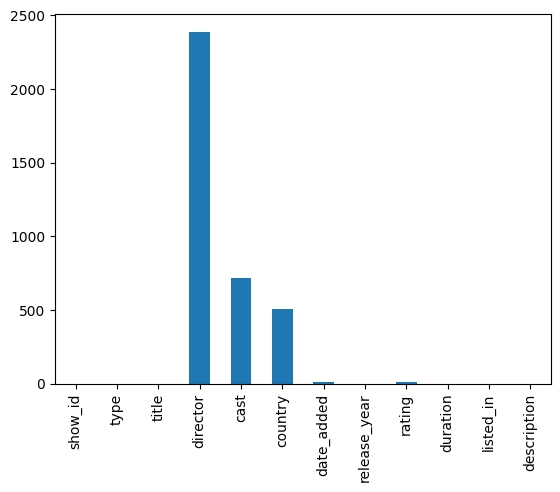

_________________________________________________________________________ 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [83]:
d=df.isna().sum()
d.plot(kind='bar')
plt.show()
print("_"*73, "\n")
print(d)

We have missing values in director,cast,country , date_adde and rating in the next section we will fill it

In [84]:
df.duplicated().sum()

0

We don't have duplicate rows

# Data cleaning and feature engineering

## Fill Null values


In the director and actor column, the mode cannot be used easily because this method will not make the correct sense.While we will be able to use it with the rest of the columns.

In [85]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])

In [86]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Feature Engineering

Here we will convert the duration into a number (indicating the length of the content in minutes) so that I can use it in the process of understanding and representing data. We will also convert the added years into two columns, one for the year and the other for the month, to study the annual and monthly impact on the content.

In [87]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else (int(x.split()[0])*60 if 'Season' in x else None))
df.drop('duration', axis=1, inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.drop('date_added', axis=1, inplace=True)

Here we decided to create a new column representing the age groups according to the given ratings data in order to study the relationship between these groups and the content.

In [88]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["rating_ages"] = df["rating"].replace(ratings_ages)

# Data Analysis

in this section we will answer about some questions that willgive us insights about this data to understand the content that produced by Netflix and the factors that affecting it

##**How content is distributed?**

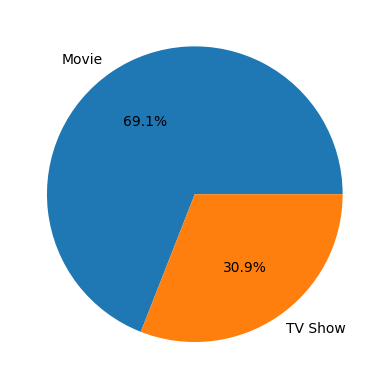

In [89]:
count = df["type"].value_counts()
plt.pie(count, labels=count.index,autopct='%1.1f%%')
plt.show()

as we can see above this dataset has 69.1% movie and 30.9% TV Show

##**What is the Top countries with most Content?**

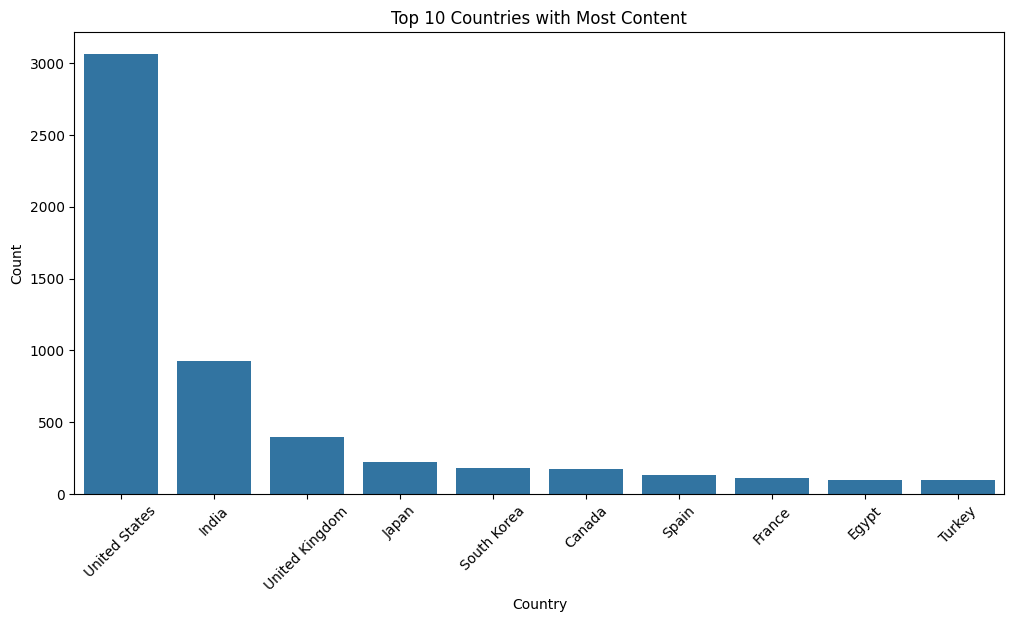

In [91]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here we see that American films are deservedly sweeping

## **How many Movie added each year?**

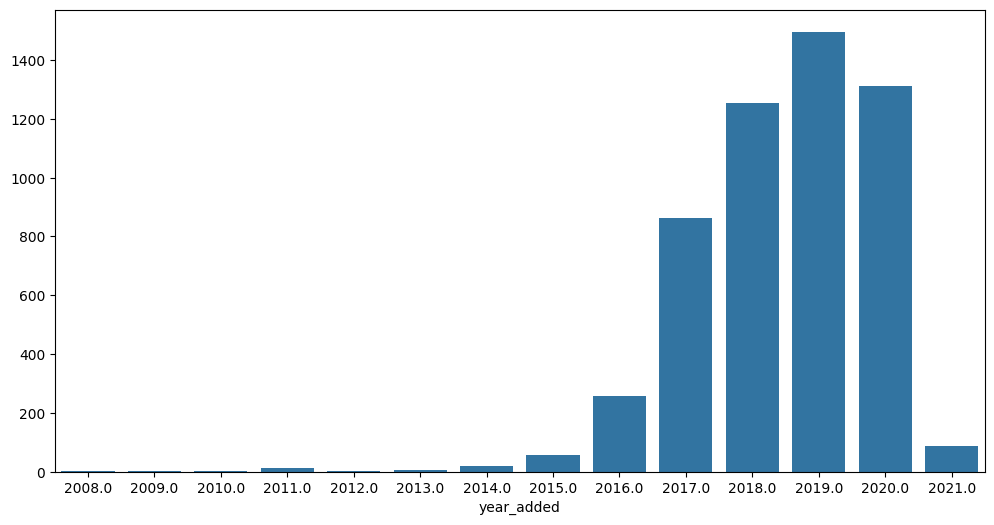

In [92]:
plt.figure(figsize=(12,6))
df_copy=df[df["type"]=="Movie"]
sns.barplot(x=df_copy["year_added"].value_counts().index, y=df_copy["year_added"].value_counts().values)
plt.show()

The most number of added movies was in the year 2019, after which there is a noticeable decline in subsequent years. This decline could be attributed to various factors such as increased competition from other streaming platforms, the impact of the COVID-19 pandemic on production, or shifts in content acquisition strategies.



## **How many Movie added each Month?**

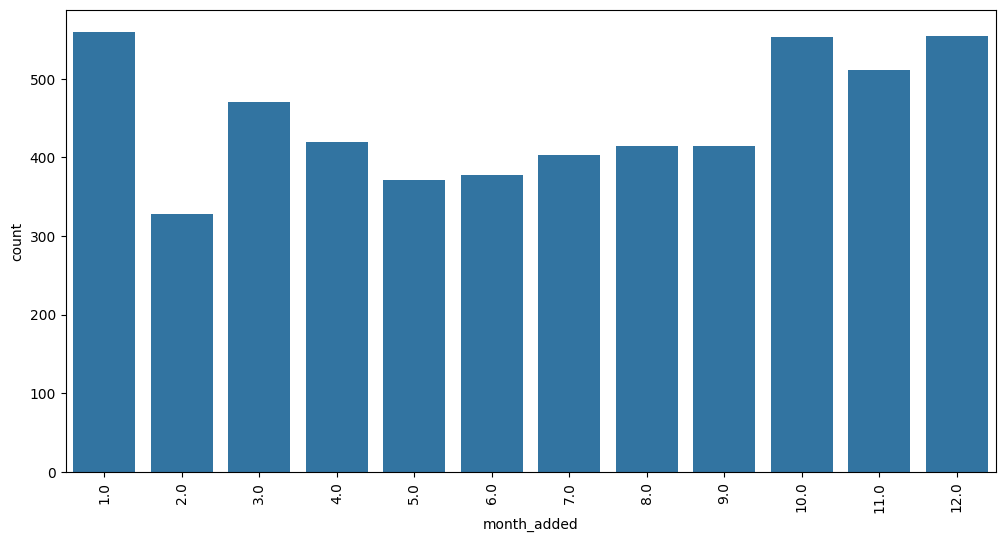

In [93]:
plt.figure(figsize=(12,6))
df_copy=df[df["type"]=="Movie"]
sns.countplot(x='month_added', data=df_copy)
plt.xticks(rotation=90)
plt.show()


There is a peak in movie additions during the months of October, December, and January.This could potentially indicate a strategy to align with holiday seasons and viewer demand during those periods.

## **What is the average duration of content over years?**

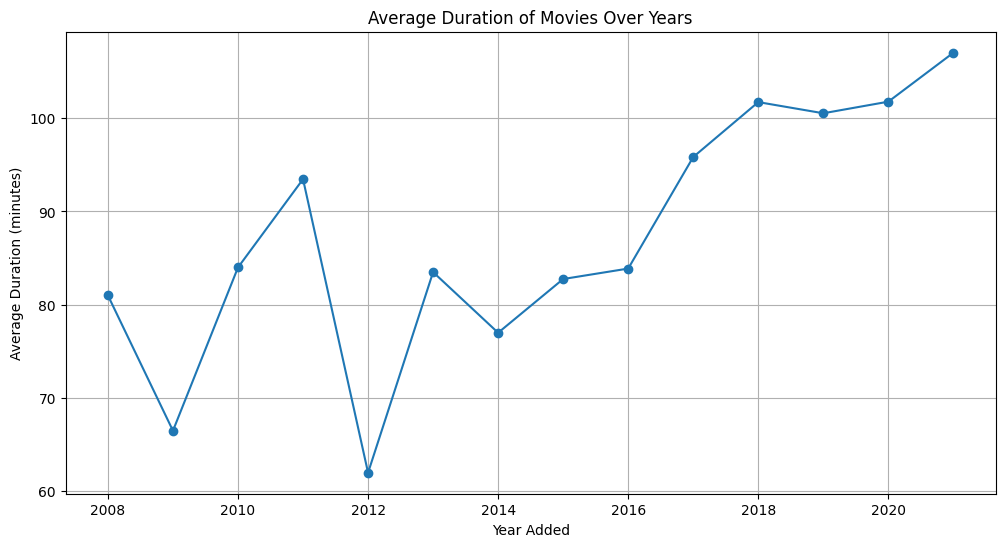

In [94]:
average_duration_over_years = df[df['type'] == 'Movie'].groupby('year_added')['duration_minutes'].mean()
plt.figure(figsize=(12, 6))
average_duration_over_years.plot(kind='line', marker='o')
plt.title('Average Duration of Movies Over Years')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()


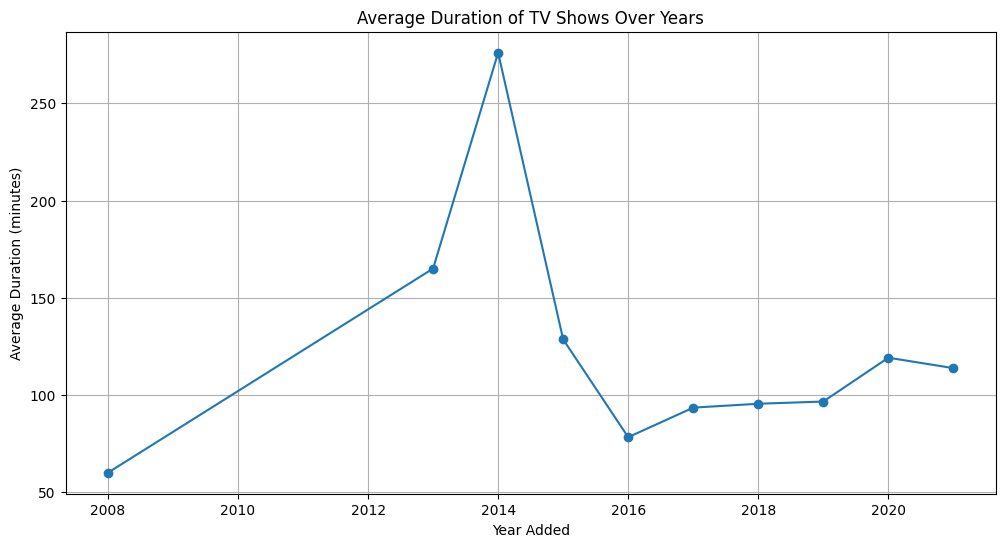

In [95]:
average_duration_over_years = df[df['type'] == 'TV Show'].groupby('year_added')['duration_minutes'].mean()
plt.figure(figsize=(12, 6))
average_duration_over_years.plot(kind='line', marker='o')
plt.title('Average Duration of TV Shows Over Years')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()


The average duration of movies seems to be fluctuations.In more recent years (post-2017), the average duration seems to have stabilized somewhat, albeit at a lower level than in the early 2010s. For TV shows, there's a more noticeable trend. The average duration has generally decreased over the years. This could suggest a shift towards shorter seasons or episodes for TV shows on Netflix.

# Hypothesis
in this section we Formulating three hypothesis about this data


* **Hypothesis 1**: The average duration of movies is longer than the average duration of TV shows.

  * Null Hypothesis (H0)*: The average duration of movies is equal to or less than the average duration of TV shows.
  * Alternative Hypothesis (H1)*: The average duration of movies is longer than the average duration of TV shows.


---


* **Hypothesis 2**: The proportion of movies added to Netflix has increased over the years.

  * Null Hypothesis (H0): The proportion of movies added to Netflix has remained constant or decreased over the years.
  * Alternative Hypothesis (H1): The proportion of movies added to Netflix has increased over the years.


---


* **Hypothesis 3**: Content with higher ratings (e.g., "Adults") tends to have longer durations.

  * Null Hypothesis (H0): There is a significant difference in duration between content rated for adults and content rated for other age groups.
  * Alternative Hypothesis (H1):There is no significant difference in duration between content rated for adults and content rated for other age groups.






T-statistic: -3.156650402493715 

P-value: 0.0016020681964779898 

Reject the null hypothesis. There is a significant difference in duration between content rated for adults and content rated for other age groups.



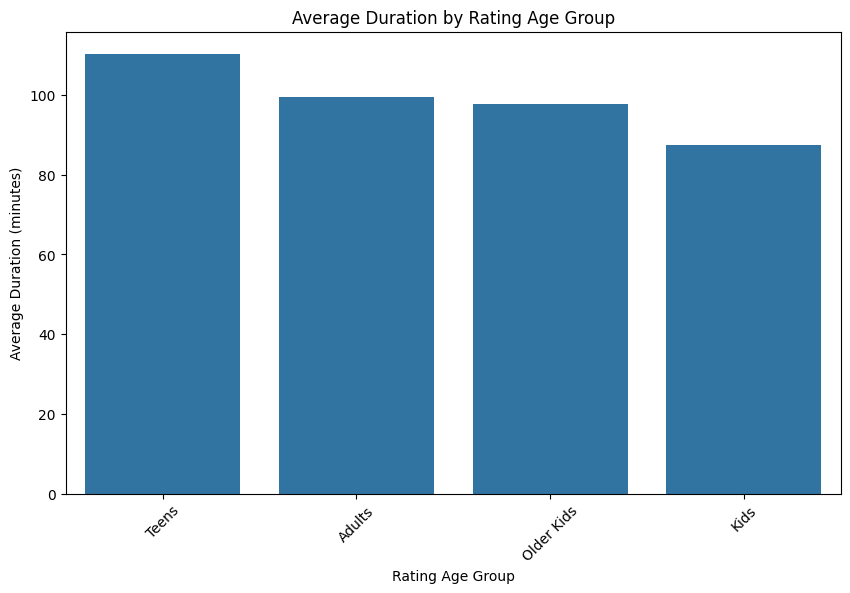

In [99]:
# Hypothesis 3: Content with higher ratings (e.g., "Adults") tends to have longer durations.

adults_content = df[df['rating_ages'] == 'Adults']['duration_minutes']
non_adults_content = df[df['rating_ages'] != 'Adults']['duration_minutes']

from scipy import stats
t_statistic, p_value = stats.ttest_ind(adults_content.dropna(), non_adults_content.dropna(), equal_var=False)

print("T-statistic:", t_statistic,"\n")
print("P-value:", p_value,'\n')
alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in duration between content rated for adults and content rated for other age groups.\n")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in duration between content rated for adults and content rated for other age groups.\n")

average_durations = df.groupby('rating_ages')['duration_minutes'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_durations.index, y=average_durations.values)
plt.title('Average Duration by Rating Age Group')
plt.xlabel('Rating Age Group')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

The results of the t-test and the bar chart can be used to discuss the hypothesis.If the p-value is less than the significance level, it provides evidence to support the hypothesis that content with higher ratings tends to have longer durations.The bar chart visually shows the average durations for each rating age group, allowing for a comparison.It's important to note that correlation does not equal causation. While there may be a statistical association between higher ratings and longer durations, other factors could be influencing this relationship.

# Next steps in analyzing this data


---

* Analyze cast and director influence
* Investigate regional preferences  
* Prepare data for modeling (example using logistic regression for rating prediction)
* Sentiment analysis (Use natural language processing (NLP) techniques to extract keywords and themes from the 'description' column.)
* Develop a recommendation system to suggest titles to users based on their preferences and viewing history
* Time Series Analysis: Explore the seasonality of content additions and viewership patterns.(Requires additional data on viewership metrics)
* Competitive Analysis:
  * Gather data on content offerings from other streaming platforms.
  * Compare Netflix's content strategy and performance against its competitors.


# Summary
The dataset provides a comprehensive overview of Netflix titles, including information about release year, rating, genre, cast, director, and country. It is valuable for understanding content trends and exploring user preferences. However, it has limitations.The dataset lacks user-specific data, such as ratings or viewing history, which would be crucial for building a recommendation system.Additionally, it lacks textual data like descriptions or reviews, which could be used for sentiment analysis.To further enhance the analysis, additional data could be requested, such as:
* User ratings and reviews: To understand audience sentiment and preferences.
* User viewing history: To build personalized recommendation systems.
* Content descriptions: To perform text analysis and extract additional features.
* Budget and revenue data: To analyze the financial performance of different titles.